In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from operator import attrgetter
from datetime import datetime, timedelta, timezone

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tracker import plotter
from tracker.satellite import Satellite
from tracker.tle import TLE

In [3]:
zarya_tle_archive = None
archive_path = 'tle_files/zarya_2017-2018_tles.txt'

with open(archive_path, 'r') as f_archive:
    zarya_tle_archive = f_archive.read()
    
tle_lines = zarya_tle_archive.split('\n')[:-1]
tles_file = []

for i in range(0, len(tle_lines), 2):
    line1, line2 = tle_lines[i:i + 2]
    tle = TLE(line1, line2)
    tles_file.append(tle)
    
tles_file.sort(key=attrgetter('epoch'))

tles = [tles_file[0]]
for i in range(1, len(tles_file)):
    if tles_file[i].epoch != tles_file[i - 1].epoch:
        tles.append(tles_file[i])

In [4]:
print('tles =\n{}'.format(tles[:5]))

tles =
[(25544, 2017/01/01 02:33:31), (25544, 2017/01/01 04:02:33), (25544, 2017/01/01 13:50:04), (25544, 2017/01/01 17:02:00), (25544, 2017/01/02 00:38:51)]


In [5]:
start = datetime(year=2018,
                 month=1,
                 day=1,
                 second=0,
                 tzinfo=timezone.utc)
SECONDS = 1000
delta = timedelta(seconds=SECONDS)
end = start + delta

TLE = tles[0]

print('from [{}] to [{}]'.format(start, end))
print('tle = {},{}'.format(*(tle.tle)))

from [2018-01-01 00:00:00+00:00] to [2018-01-01 00:16:40+00:00]
tle = 1 25544U 98067A   18295.94572856  .00000951  00000-0  21804-4 0  9995,2 25544  51.6420 102.0569 0003683 324.9550 156.3376 15.53849173138381


Step = 5
plotted points between [2018-01-01 00:00:00+00:00] and [2018-01-01 00:16:35+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


,Azimuth,Elevation,Date
0,48.523106,-62.194823,2018-01-01 00:00:00+00:00
1,48.245182,-62.307261,2018-01-01 00:00:05+00:00
2,47.965854,-62.419412,2018-01-01 00:00:10+00:00
3,47.685102,-62.531276,2018-01-01 00:00:15+00:00
4,47.402912,-62.642848,2018-01-01 00:00:20+00:00
5,47.119270,-62.754122,2018-01-01 00:00:25+00:00
6,46.834155,-62.865097,2018-01-01 00:00:30+00:00
7,46.547554,-62.975768,2018-01-01 00:00:35+00:00
8,46.259452,-63.086131,2018-01-01 00:00:40+00:00
9,45.969829,-63.196181,2018-01-01 00:00:45+00:00


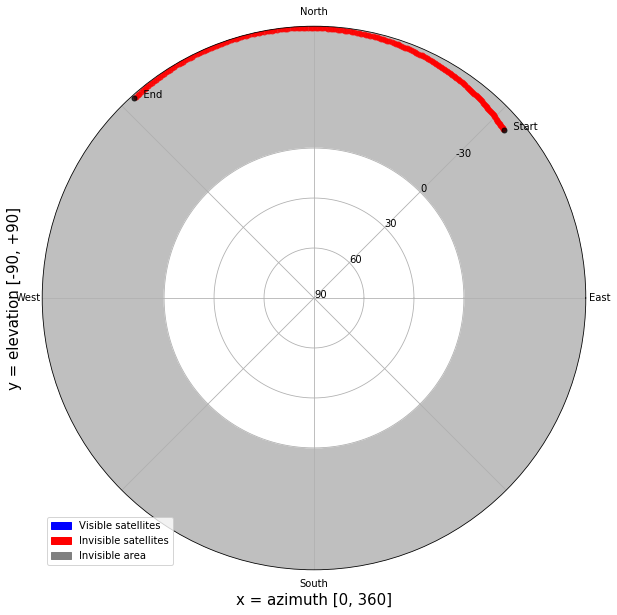

In [6]:
def plot1(tle):
    OBS_LAT = -15.989620
    OBS_LON = -48.044411
    OBS_ALT = 500 # meters
    
    sat1 = Satellite(*tle.tle)
    
    return plotter.see_satellite(sat1, OBS_LAT, OBS_LON, OBS_ALT, start, end, count=SECONDS // 5, annotate=True, title='')

plot1(TLE)

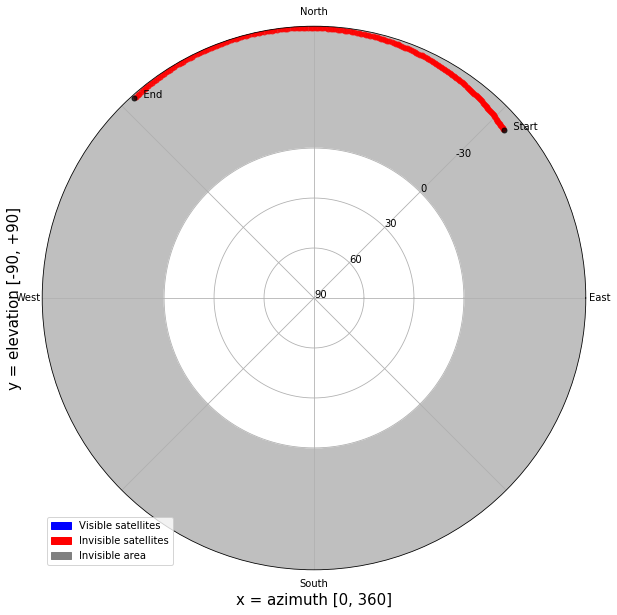

In [14]:
def plot2(tle):
    OBS_LAT = -15.989620
    OBS_LON = -48.044411
    OBS_ALT = 500 # meters
    
    sat = Satellite(*tle.tle)
    azel_dates = sat.propagate_az_el_step(OBS_LAT, OBS_LON, OBS_ALT, start, 200, 5)
    az, el = list(zip(*azel_dates[0]))
    plotter.plot_az_el(az, el)

plot2(TLE)